In [32]:
%matplotlib inline
#computation
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

#plotting
import matplotlib.pyplot as pl
import seaborn as sns
sns.set_style("ticks", {'axes.grid' : True})
# pl.rc("figure", facecolor="white",figsize = (3,2))
pl.rc("figure", facecolor="gray",figsize = (8,8))

pl.rc('text', usetex=True)
pl.rc('text.latex', preamble=[r'\usepackage{amsmath}'])
pl.rc('lines',markeredgewidth = 2)
pl.rc('font',size = 12)
# params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
# pyplot.rcParams.update(params)

#utils
# import time
# from copy import deepcopy
# from functools import partial
# import itertools
# from importlib import reload

#notebook config
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import Math

from itertools import product
from scipy import special

In [2]:
import scipy.io as spio
mat = spio.loadmat('../data/both_monkeys_lip_nocon.mat', squeeze_me=True)

In [3]:
mat['both_monkeys_lip_nocon'].flatten().dtype.names

('date',
 'dots2',
 'dots4',
 'memory',
 'overlap',
 'depth',
 'dots8',
 'prefdir',
 'whichunit',
 'complete',
 'prefire',
 'iscomplete',
 'location',
 'angcont',
 'dots8_partial',
 'prefire_time',
 'dotfire',
 'sacfire',
 'sacfireNULL',
 'dotfireNULL',
 'sacfirert',
 'dotfirert',
 'sacfireRT_NULL',
 'dotfireRT_NULL',
 'dotfirertNULL',
 'sacfirertNULL',
 'anglecontrol',
 'otherdirs',
 'allnums',
 'newit',
 'rts',
 'anglecontrol45',
 'monkey',
 'plx_new')

example micro structure

In [4]:
mat['both_monkeys_lip_nocon'][0]['allnums'][1]['data'][0]['dotfire_time'][0]['spiketimes'][0].dtype.names

('targtodots',
 'targ',
 'rt',
 'dots',
 'sacc',
 'coh',
 'dir',
 'numtargs',
 'choice',
 'score')

In [5]:
list(mat['both_monkeys_lip_nocon'][0]['allnums'][1]['data'][0]['dotfire_time'][0]['spiketimes'][0].tolist())

[497.1750000000029,
 array([-632.325, -546.675, -465.9  , -184.8  , -159.25 , -124.4  ,
        -114.675, -105.825,  -12.4  ,   44.825,   73.025,  104.825,
         131.775,  205.65 ,  291.7  ,  319.05 ,  330.375,  346.75 ,
         366.95 ,  376.65 ,  419.6  ]),
 720.5500000000029,
 array([-1129.5  , -1043.85 ,  -963.075,  -681.975,  -656.425,  -621.575,
         -611.85 ,  -603.   ,  -509.575,  -452.35 ,  -424.15 ,  -392.35 ,
         -365.4  ,  -291.525,  -205.475,  -178.125,  -166.8  ,  -150.425,
         -130.225,  -120.525,   -77.575,    79.85 ,    93.8  ,   100.7  ,
          109.6  ,   116.675,   150.45 ,   268.775,   316.4  ,   380.925,
          390.95 ,   429.125,   465.   ,   576.05 ,   659.05 ,   665.85 ,
          703.875,   735.125,   741.525,   766.975,   888.1  ]),
 array([-1850.05 , -1764.4  , -1683.625, -1402.525, -1376.975, -1342.125,
        -1332.4  , -1323.55 , -1230.125, -1172.9  , -1144.7  , -1112.9  ,
        -1085.95 , -1012.075,  -926.025,  -898.675,  -887.3

convert to dataframe

In [6]:
raw_data=mat['both_monkeys_lip_nocon'].flatten()
col_names=raw_data.dtype.names
df_data=pd.DataFrame(columns=col_names)
for col_name in col_names:
    df_data[col_name]=raw_data[col_name]
df_data.head()

,date,dots2,dots4,memory,overlap,depth,dots8,prefdir,whichunit,complete,...,dotfirertNULL,sacfirertNULL,anglecontrol,otherdirs,allnums,newit,rts,anglecontrol45,monkey,plx_new
0,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],[],[],[],"[[[], []], [[(array([[ 0. , 11.292189...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0
1,012505,2-4_2,2-4_2,memory_2,overlap_2,3250,8_2,100,1,1,...,[],[],[],[],"[[[], []], [[(array([[ 0. , 3.966298...",[],"[[[]], [[[ 0. 677.04886364 33.717126...",[],[],1
2,020105,2-4_8b,2-4_8b,memory_8,overlap_8,1805,[],90,1,0,...,[],[],[],[],"[[[], []], [[(array([[ 0. , 23.763456...",[],"[[[]], [[[ 0. 586.31071429 58.348952...",[],[],1
3,021005,2-4_x,2-4_x,memory_8,overlap_8,3650,8_8,135,1,[],...,[],[],[],[],"[[[], []], [[(array([[ 0. , 6.750467...",[],"[[[]], [[[ 0. 577.21309524 17.372067...",[],[],1
4,021705,2-4_4,2-4_4,memory_4,overlap_4,1925,[],180,1,1,...,[],[],[],[],"[[[], []], [[(array([[ 0. , 51.895839...",[],"[[[]], [[[ 0. 666.02857143 40.883048...",[],[],1


In [7]:
df_data.iloc[0].allnums[1].dtype.names

('data', 'prefire')

Explode choice experiments

In [8]:
df_data.allnums=df_data.allnums.apply(lambda row: [(2,row[1]),(4,row[3])])   #pull out and label each experiment
df_data=df_data.explode('allnums',ignore_index=True)
df_data['choice_exp']=df_data.allnums.apply(lambda row:row[0]) #pull out label
df_data.allnums=df_data.allnums.apply(lambda row:row[1]) #overwrite without label
df_data.head()

,date,dots2,dots4,memory,overlap,depth,dots8,prefdir,whichunit,complete,...,sacfirertNULL,anglecontrol,otherdirs,allnums,newit,rts,anglecontrol45,monkey,plx_new,choice_exp
0,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],[],[],[[[[[ 0. 11.2921899 ]\n [ 32. ...,[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2
1,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],[],[],[[[[[ 0. 8.87197279]\n [ 32. ...,[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,4
2,012505,2-4_2,2-4_2,memory_2,overlap_2,3250,8_2,100,1,1,...,[],[],[],[[[[[ 0. 3.96629886]\n [ 32. ...,[],"[[[]], [[[ 0. 677.04886364 33.717126...",[],[],1,2
3,012505,2-4_2,2-4_2,memory_2,overlap_2,3250,8_2,100,1,1,...,[],[],[],[[[[[ 0. 4.18078425]\n [ 32. ...,[],"[[[]], [[[ 0. 677.04886364 33.717126...",[],[],1,4
4,020105,2-4_8b,2-4_8b,memory_8,overlap_8,1805,[],90,1,0,...,[],[],[],[[[[[ 0. 23.76345682]\n [ 32. ...,[],"[[[]], [[[ 0. 586.31071429 58.348952...",[],[],1,2


In [9]:
df_data.iloc[0].allnums.dtype.names

('data', 'prefire')

explode particular choice

In [10]:
df_data.allnums=df_data.allnums.apply(lambda row: [[idx,data] for idx,data in zip(range(len(row['data'])),row['data'])])   #pull out and label each experiment
df_data=df_data.explode('allnums',ignore_index=True).dropna()
df_data['choice']=df_data.allnums.apply(lambda row: row[0]) #pull out label
df_data.allnums=df_data.allnums.apply(lambda row:row[1]) #overwrite without label
df_data.head()

,date,dots2,dots4,memory,overlap,depth,dots8,prefdir,whichunit,complete,...,anglecontrol,otherdirs,allnums,newit,rts,anglecontrol45,monkey,plx_new,choice_exp,choice
0,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],[],"[[[0.0, 11.292189902881516], [32.0, 11.7589589...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,0
1,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],[],"[[[0.0, 11.292189902881516], [32.0, 10.4421939...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,1
2,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],[],"[[[0.0, 8.871972789479809], [32.0, 9.141841542...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,4,0
3,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],[],"[[[0.0, 8.871972789479809], [32.0, 9.638792504...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,4,1
4,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],[],"[[[0.0, 8.871972789479809], [32.0, 10.75378004...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,4,2


In [11]:
df_data.iloc[0].allnums.dtype.names

('prefire',
 'prefire_time',
 'dotfire',
 'dotfire_time',
 'sacfire',
 'sacfire_time',
 'dir')

explode coherence

In [12]:
df_data.allnums=df_data.allnums.apply(lambda row: [(coherence,data) for coherence,data in zip(row['dotfire_time']['coh'],row['dotfire_time'])])   #pull out and label each experiment
df_data=df_data.explode('allnums',ignore_index=True)
df_data['coherence']=df_data.allnums.apply(lambda row:row[0]) #pull out label
df_data.allnums=df_data.allnums.apply(lambda row:row[1]).dropna() #overwrite without label
df_data.head()

,date,dots2,dots4,memory,overlap,depth,dots8,prefdir,whichunit,complete,...,otherdirs,allnums,newit,rts,anglecontrol45,monkey,plx_new,choice_exp,choice,coherence
0,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[-480.0, 9.402030838661151], [-440.0, 12.359...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,0,0
1,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[-480.0, 8.70253164556962], [-440.0, 15.1515...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,0,32
2,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[-480.0, 9.675190048375951], [-440.0, 9.4594...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,0,64
3,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[-480.0, 9.623797025371827], [-440.0, 7.7700...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,0,128
4,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[-480.0, 7.363770250368188], [-440.0, 11.428...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,0,256


In [13]:
df_data.iloc[0].allnums.dtype.names

('data', 'coh', 'pspike', 'spiketimes', 'numtrials_dots')

No empty data so no need for this block

In [14]:
# df_data.allnums.apply(lambda row:row['spiketimes'].shape==()).sum()
# df_data.allnums.apply(lambda row:row['spiketimes'].shape==(0,)).sum()
#Drop emtpy data
# drop_cond=df_data.allnums.apply(lambda row:(row['spiketimes'].shape==(0,)) | (row['spiketimes'].shape==()))
# df_data=df_data.drop(df_data[drop_cond].index)

explode trials

In [14]:
df_data.allnums=df_data.allnums.apply(lambda row: [(trial,data) for trial,data in zip(range(len(row['spiketimes'])),row['spiketimes'])])   #pull out and label each experiment
df_data=df_data.explode('allnums',ignore_index=True)
df_data['trial']=df_data.allnums.apply(lambda row:row[0]) #pull out label
df_data.allnums=df_data.allnums.apply(lambda row:row[1]) #overwrite without label
df_data.head()

,date,dots2,dots4,memory,overlap,depth,dots8,prefdir,whichunit,complete,...,allnums,newit,rts,anglecontrol45,monkey,plx_new,choice_exp,choice,coherence,trial
0,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,"[497.1750000000029, [-632.3249999999971, -546....",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,0,0,0
1,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,"[498.125, [-820.5749999999971, -800.8000000000...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,0,0,1
2,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,"[502.32499999998254, [-421.8999999999942, -87....",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,0,0,2
3,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,"[498.125, [-832.25, -618.3499999999767, -571.3...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,0,0,3
4,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,"[428.20000000001164, [-776.1749999999884, -741...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,2,0,0,4


In [40]:
df_data.iloc[0].allnums.dtype.names

AttributeError: 'Series' object has no attribute 'allnums'

assign data structure

In [16]:
for col_name in df_data.iloc[0].allnums.dtype.names:
    df_data[col_name]=df_data.allnums.apply(lambda row:row[col_name]) 
df_data=df_data.drop(labels='allnums',axis=1)

In [13]:
col_names=('targtodots',
 'targ',
 'rt',
 'dots',
 'sacc',
 'coh',
 'dir',
 'numtargs',
 'choice',
 'score')

In [38]:
(df_data['coh'].astype(str)=='[]').sum()

0

In [39]:
df_data=df_data.drop(df_data[df_data['coh'].astype(str)=='[]'].index)

In [41]:
df_data.dtypes

date              object
dots2             object
dots4             object
memory            object
overlap           object
depth             object
dots8             object
prefdir           object
whichunit         object
complete          object
prefire           object
iscomplete        object
location          object
angcont           object
dots8_partial     object
prefire_time      object
dotfire           object
sacfire           object
sacfireNULL       object
dotfireNULL       object
sacfirert         object
dotfirert         object
sacfireRT_NULL    object
dotfireRT_NULL    object
dotfirertNULL     object
sacfirertNULL     object
anglecontrol      object
otherdirs         object
newit             object
rts               object
anglecontrol45    object
monkey            object
plx_new           object
choice_exp         int64
choice            object
coherence          int64
trial              int64
targtodots        object
targ              object
rt                object


In [21]:
for colname in col_names:
    df_data[colname]=df_data[colname]

KeyError: 'allnums'

In [42]:
list(df_data.columns)

['date',
 'dots2',
 'dots4',
 'memory',
 'overlap',
 'depth',
 'dots8',
 'prefdir',
 'whichunit',
 'complete',
 'prefire',
 'iscomplete',
 'location',
 'angcont',
 'dots8_partial',
 'prefire_time',
 'dotfire',
 'sacfire',
 'sacfireNULL',
 'dotfireNULL',
 'sacfirert',
 'dotfirert',
 'sacfireRT_NULL',
 'dotfireRT_NULL',
 'dotfirertNULL',
 'sacfirertNULL',
 'anglecontrol',
 'otherdirs',
 'newit',
 'rts',
 'anglecontrol45',
 'monkey',
 'plx_new',
 'choice_exp',
 'choice',
 'coherence',
 'trial',
 'targtodots',
 'targ',
 'rt',
 'dots',
 'sacc',
 'coh',
 'dir',
 'numtargs',
 'score',
 'correct']

In [43]:
len(df_data)

71087

In [27]:
(df_data.coherence!=df_data.coh).sum()

0

## Reward rates

from Churchland 2008 ratio of reward rates between contexts matches ratio of fitted half maximums of neural urgency within 10% error

In [28]:
halfmax_para_4ch_to_2ch=343/133

Text(0, 0.5, '$\\rho_{\\textrm{4-choice}}/\\rho_{\\textrm{2-choice}}$')

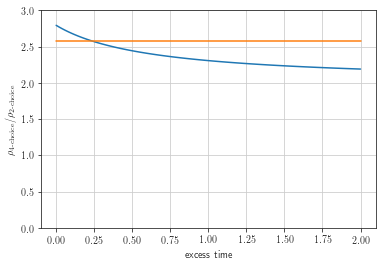

In [29]:
fig,ax=pl.subplots()
excess_time=np.linspace(0,2,100)
#all for zero coherence
mean_time_2ch=0.63
mean_time_4ch=0.88
acc_2ch=1/2
acc_4ch=1/4
RR_2ch=acc_2ch/(mean_time_2ch+excess_time)
RR_4ch=acc_4ch/(mean_time_4ch+excess_time)
ax.plot(excess_time,RR_2ch/RR_4ch)

ax.plot(excess_time,halfmax_para_4ch_to_2ch*np.ones(excess_time.shape))
ax.set_ylim(0,3)
ax.set_xlabel('excess time')
ax.set_ylabel(r'$\rho_{\textrm{4-choice}}/\rho_{\textrm{2-choice}}$')

In [44]:
dftmp=df_data.loc[:,('choice_exp','coherence','rt','correct')]

In [45]:
dftmp.rt=dftmp.rt.astype(float)#apply(pd.to_numeric, errors='coerce')

In [59]:
dftmp['rt']=dftmp['rt'].apply(pd.to_numeric, errors='coerce')

In [ ]:
plot(x='rt')

In [140]:
dftmp.groupby(by=['choice_exp','coherence'])['rt'].mean()

choice_exp  coherence
2           0            631.480526
            32           628.007881
            64           604.619292
            90           589.020035
            128          540.849585
            256          443.079240
            512          333.014623
            724          325.977019
            768          300.758181
4           0            878.618729
            32           852.696782
            64           738.265517
            90           792.251812
            128          646.083296
            256          498.631037
            512          342.912053
            724          340.445087
            768          310.328936
Name: rt, dtype: float64

In [164]:
accuracy=np.zeros((2,len(bins)))
accuracy_std=np.zeros((2,len(bins)))
for cit,choice_exp in enumerate((2,4)):
    bins=50*np.arange(40)
    dftmp['bin_index']=dftmp.rt.apply(lambda x:np.argmin(np.fabs(x-bins)))#.apply(lambda x: x[0] if len(x)>0 else -1)  
    for bit,bin_ind in enumerate(bins):
        accuracy[cit,bit]=dftmp[(dftmp.bin_index==bit) & (dftmp.choice_exp==choice_exp)].correct.mean()
        accuracy_std[cit,bit]=dftmp[(dftmp.bin_index==bit) & (dftmp.choice_exp==choice_exp)].correct.std()

/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


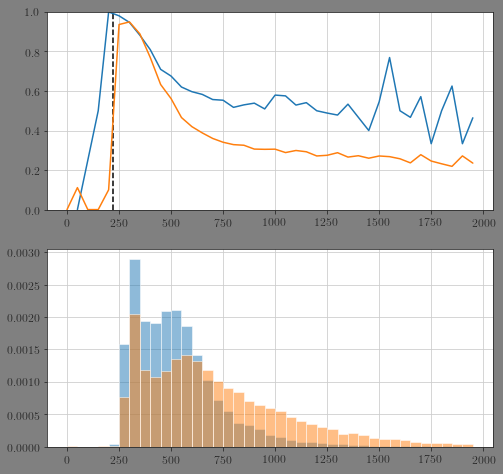

In [171]:
fig,ax=pl.subplots(2,1)
ax[0].axvline(220,ls='--',color='k')
for cit,choice_exp in enumerate((2,4)):
#     ax.errorbar(x=bins,y=accuracy[cit],yerr=accuracy_std[cit])
    ax[0].plot(bins,accuracy[cit])
    rho_test=0.003
#     pred_bound=1-rho_test*(bins-220)/(1+rho_test*(bins-220))
#     ax.plot(bins,pred_bound,'r-')
    ax[0].set_ylim(0,1)
    dftmp[dftmp.choice_exp==choice_exp].rt.hist(ax=ax[1],alpha=0.5,bins=bins,normed=True)

## Urgency

get Tin and Tout groups to make urgency

In [22]:
df_data.dir.unique()

array([135, 315, 45, 225, 100, 280, 10, 190, 90, 270, 0, 180, 65, 245,
       155, 335, 70, 250, 160, 340, 35, 215, 125, 305, 20, 200, 110, 290,
       12, 192, 102, 282, 40, 220, 130, 310, 25, 205, 115, 295, 15, 195,
       105, 285, 55, 235, 145, 325, 170, 350, 80, 260, 30, 210, 120, 300,
       140, 320, 50, 230, 150, 330, 60, 240, 58, 238, 148, 328],
      dtype=object)

In [23]:
df_data.prefdir.unique()

array([135, 100, 90, 180, 245, 225, 250, 215, 190, 155, 200, 270, 192,
       220, 205, 195, 235, 170, 210, 140, 315, 280, 330, 340, 25, 350,
       260, 60, 238, 45, 20], dtype=object)

In [24]:
(df_data.prefdir==df_data.dir).sum()/len(df_data)

0.3177233530744018

In [25]:
Tin_cond=(df_data.prefdir==df_data.dir)
Tout_cond=(df_data.prefdir!=df_data.dir)
rec_field_cond={'Tin':Tin_cond,'Tout':Tout_cond}

In [26]:
df_data.trial.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [27]:
(df_data.dir==df_data.choice).mean()

0.5550663271765583

In [28]:
df_data.rt.mean()

671.3081526861697

In [29]:
for choice_exp in [2,4]:
    acc=(df_data[df_data.choice_exp==choice_exp].dir==df_data[df_data.choice_exp==choice_exp].choice).mean()
    meanrt=df_data[df_data.choice_exp==choice_exp].rt.mean()
    print(str(acc)+' '+str(meanrt))

0.7174532456094908 526.9896751800409
0.494534991503167 725.1042976595293


In [51]:
(df_data.rt+250).mean()

921.3081526861573

In [53]:
(526+725+500)/2

875.5

In [54]:
(df_data.choice_exp==2).sum()/(df_data.choice_exp==4).sum()

0.3727599258458211

In [45]:
(df_data[df_data.choice_exp==4].dir==df_data[df_data.choice_exp==4].choice).mean()

0.494534991503167

2
0
32
64
128
256
512
768
90


/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


724
4
0
32
64
128
256
512
768
90


/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


724
2
0
32
64
128
256
512
768
90


/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


724
4
0


/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


32
64
128
256
512
768
90


/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


724


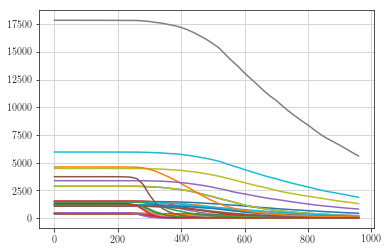

In [31]:
urgency_data=dict.fromkeys(['Tin','Tout'])
RT_data=dict.fromkeys(['Tin','Tout'])
bin_width=20
bins=np.arange(0,1000,bin_width)
fig,ax=pl.subplots()
for is_rec_field in urgency_data.keys():
    urgency_data[is_rec_field]=dict.fromkeys([2,4])
    RT_data[is_rec_field]=dict.fromkeys([2,4])
    for choice_exp in [2,4]:
        print(choice_exp)
        coherences=df_data[rec_field_cond[is_rec_field] & (df_data.choice_exp==choice_exp)].coherence.unique()
        urgency_data[is_rec_field][choice_exp]=dict.fromkeys(coherences)
        RT_data[is_rec_field][choice_exp]=dict.fromkeys(coherences)
        for coherence in coherences:
            print(coherence)
            spike_time_data=df_data.loc[rec_field_cond[is_rec_field] & (df_data.choice_exp==choice_exp) & (df_data.coherence==coherence),('dots','rt')]
            
            #get normalization factor for each bin by counting number of cellxtrials combo's for trials before response time
            counts,bins=np.histogram(spike_time_data.rt,bins)#value_counts().cumsum()
            RT_data[is_rec_field][choice_exp][coherence]=counts
            num_active_trials=len(spike_time_data)-np.cumsum(counts)
            ax.plot(bins[:-1],num_active_trials)
            #explode spiketimes
            exploded_spike_binidx_data=spike_time_data.explode('dots')#/bin_width).astype(int)
            
            #remove spikes happening after the subjects response time.
            exploded_spike_binidx_data=exploded_spike_binidx_data.drop(exploded_spike_binidx_data[exploded_spike_binidx_data.dots>exploded_spike_binidx_data.rt].index)
            
            counts,bins=np.histogram(exploded_spike_binidx_data,bins)
            urgency_data[is_rec_field][choice_exp][coherence]=counts/num_active_trials
#             urgency_data[is_rec_field][choice_exp][coherence]=(num_trials,np.histogram(spike_times,bins=bins))
            
            
            

In [35]:
df_data['correct']=(df_data.dir==df_data.choice)

In [37]:
df_data.choice

0        135
1        315
2        135
3        315
4        135
        ... 
71159    270
71160    270
71161    270
71162    270
71163    270
Name: choice, Length: 71087, dtype: object

In [37]:
urgency_data=dict.fromkeys(['Tin','Tout'])
RT_data=dict.fromkeys(['Tin','Tout'])
bin_width=20
bins=np.arange(0,1000,bin_width)
# fig,ax=pl.subplots()
for is_rec_field in urgency_data.keys():
    urgency_data[is_rec_field]=dict.fromkeys([2,4])
    RT_data[is_rec_field]=dict.fromkeys([2,4])
    for choice_exp in [2,4]:
        print(choice_exp)
        coherences=df_data[rec_field_cond[is_rec_field] & (df_data.choice_exp==choice_exp)].coherence.unique()
        urgency_data[is_rec_field][choice_exp]=dict.fromkeys(coherences)
        RT_data[is_rec_field][choice_exp]=dict.fromkeys(coherences)
        for coherence in coherences:
            print(coherence)
            spike_time_data=df_data.loc[rec_field_cond[is_rec_field] & (df_data.choice_exp==choice_exp) & (df_data.coherence==coherence),('dots','rt')]
            
            #get normalization factor for each bin by counting number of cellxtrials combo's for trials before response time
            counts,bins=np.histogram(spike_time_data.rt,bins)#value_counts().cumsum()
            RT_data[is_rec_field][choice_exp][coherence]=counts
            num_active_trials=len(spike_time_data)-np.cumsum(counts)
            ax.plot(bins[:-1],num_active_trials)
            #explode spiketimes
            exploded_spike_binidx_data=spike_time_data.explode('dots')#/bin_width).astype(int)
            
            #remove spikes happening after the subjects response time.
            exploded_spike_binidx_data=exploded_spike_binidx_data.drop(exploded_spike_binidx_data[exploded_spike_binidx_data.dots>exploded_spike_binidx_data.rt].index)
            
            counts,bins=np.histogram(exploded_spike_binidx_data,bins)
            urgency_data[is_rec_field][choice_exp][coherence]=counts/num_active_trials
#             urgency_data[is_rec_field][choice_exp][coherence]=(num_trials,np.histogram(spike_times,bins=bins))
            
            
            

2
0
32
64
128
256
512
768
90


/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


724
4
0
32
64
128
256
512
768
90


/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


724
2
0
32
64
128
256
512
768
90


/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


724
4
0


/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


32
64
128
256
512
768
90


/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/max/anaconda3/envs/py3fresh/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


724


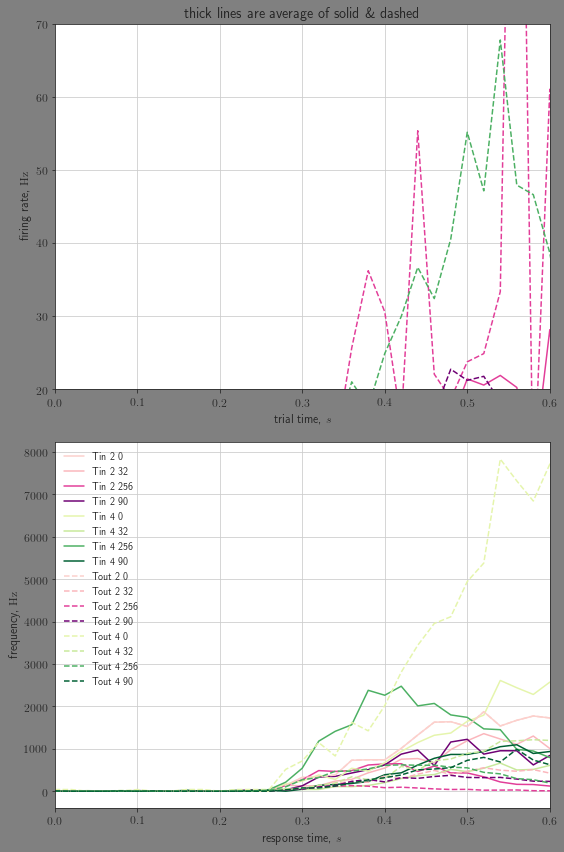

In [33]:
fig,ax=pl.subplots(2,1,figsize=(8,12))
colstr2=pl.cm.RdPu(np.linspace(0.2,1.0,len(urgency_data[is_rec_field][2].keys())))
colstr4=pl.cm.YlGn(np.linspace(0.2,1.0,len(urgency_data[is_rec_field][4].keys())))
colstrvec=(colstr2,colstr4)
for rit,is_rec_field in enumerate(urgency_data.keys()):
    for cit,choice_exp in enumerate(urgency_data[is_rec_field].keys()):
        for coit,coherence in enumerate(urgency_data[is_rec_field][choice_exp].keys()):
            if coherence in [0,32,90,256]:
                try:
                    counts=urgency_data[is_rec_field][choice_exp][coherence]
                    RT_counts=RT_data[is_rec_field][choice_exp][coherence]
                    if rit==0:
                        ax[0].plot(bins[:-1]/1000,counts/np.diff(bins)*1000,'-',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))
                        ax[1].plot(bins[:-1]/1000,RT_counts/np.sum(counts)/np.diff(bins)*1000,'-',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))
                    else:
                        ax[0].plot(bins[:-1]/1000,counts/np.diff(bins)*1000,'--',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))
                        ax[1].plot(bins[:-1]/1000,RT_counts/np.sum(counts)/np.diff(bins)*1000,'--',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))
                except:
                    print('')
                    

# # for rit,is_rec_field in enumerate(urgency_data.keys()):
# for cit,choice_exp in enumerate(urgency_data[is_rec_field].keys()):
#     for coit,coherence in enumerate(urgency_data[is_rec_field][choice_exp].keys()):
#         if coherence in [0,32,90,256]:
#             counts_in=urgency_data['Tin'][choice_exp][coherence]
#             counts_out=urgency_data['Tout'][choice_exp][coherence]
#             counts=(counts_in+ counts_out)/2
# #             counts=counts_in/(num_trials_in+num_trials_out) + counts_out/(num_trials_in+num_trials_out)
#             ax[0].plot(bins[:-1]/1000,counts/np.diff(bins)*1000,'-',lw=4,color=colstrvec[cit][coit])


ax[1].legend(frameon=False,prop={"size":10})
ax[0].set_xlabel('trial time, $s$')
ax[0].set_ylabel(r'firing rate, $\textrm{Hz}$')
ax[0].set_ylim([20,70])
ax[0].set_title('thick lines are average of solid \& dashed')
ax[0].set_xlim([0,0.6])
ax[1].set_xlabel('response time, $s$')
ax[1].set_ylabel(r'frequency, $\textrm{Hz}$')
ax[1].set_xlim([0,0.6])
fig.tight_layout()
# fig.savefig('LIP_urgency.pdf',transparent=True,bbox_inches='tight',dpi=300)

ValueError: too many values to unpack (expected 2)

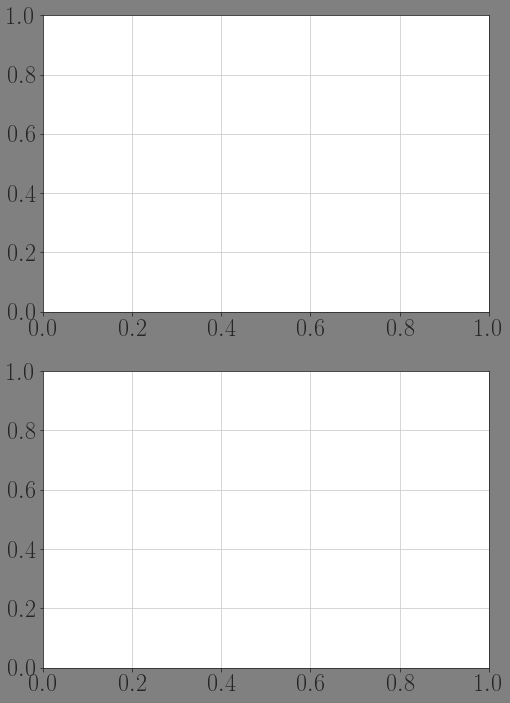

In [157]:
fig,ax=pl.subplots(2,1,figsize=(8,12))
colstr2=pl.cm.RdPu(np.linspace(0.2,1.0,len(urgency_data[is_rec_field][2].keys())))
colstr4=pl.cm.YlGn(np.linspace(0.2,1.0,len(urgency_data[is_rec_field][4].keys())))
colstrvec=(colstr2,colstr4)
for rit,is_rec_field in enumerate(urgency_data.keys()):
    for cit,choice_exp in enumerate(urgency_data[is_rec_field].keys()):
        for coit,coherence in enumerate(urgency_data[is_rec_field][choice_exp].keys()):
            if coherence in [0,32,90,256]:
                num_trials,histdata=urgency_data[is_rec_field][choice_exp][coherence]
                counts,bins=histdata
                RT_counts,bins=RT_data[is_rec_field][choice_exp][coherence]
                if rit==0:
                    ax[0].plot(bins[:-1]/1000,counts/np.diff(bins)*1000/num_trials,'-',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))
                    ax[1].plot(bins[:-1]/1000,RT_counts/np.sum(counts)/np.diff(bins)*1000,'-',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))
                else:
                    ax[0].plot(bins[:-1]/1000,counts/np.diff(bins)*1000/num_trials,'--',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))
                    ax[1].plot(bins[:-1]/1000,RT_counts/np.sum(counts)/np.diff(bins)*1000,'--',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))

# for rit,is_rec_field in enumerate(urgency_data.keys()):
for cit,choice_exp in enumerate(urgency_data[is_rec_field].keys()):
    for coit,coherence in enumerate(urgency_data[is_rec_field][choice_exp].keys()):
        if coherence in [0,32,90,256]:
            counts_in=urgency_data['Tin'][choice_exp][coherence]
            counts_out=urgency_data['Tout'][choice_exp][coherence]
            counts=(counts_in+ counts_out)/2
#             counts=counts_in/(num_trials_in+num_trials_out) + counts_out/(num_trials_in+num_trials_out)
            ax[0].plot(bins[:-1]/1000,counts/np.diff(bins)*1000,'-',lw=4,color=colstrvec[cit][coit])


ax[1].legend(frameon=False,prop={"size":10})
ax[0].set_xlabel('trial time, $s$')
ax[0].set_ylabel(r'firing rate, $\textrm{Hz}$')
ax[0].set_ylim([20,70])
ax[0].set_title('thick lines are average of solid \& dashed')
ax[0].set_xlim([0,0.6])
ax[1].set_xlabel('response time, $s$')
ax[1].set_ylabel(r'frequency, $\textrm{Hz}$')
ax[1].set_xlim([0,0.6])
fig.tight_layout()
# fig.savefig('LIP_urgency.pdf',transparent=True,bbox_inches='tight',dpi=300)

These are the distribution of all reaction times:

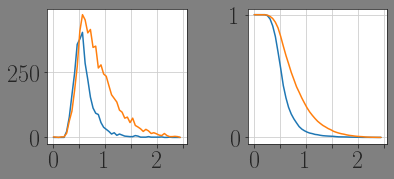

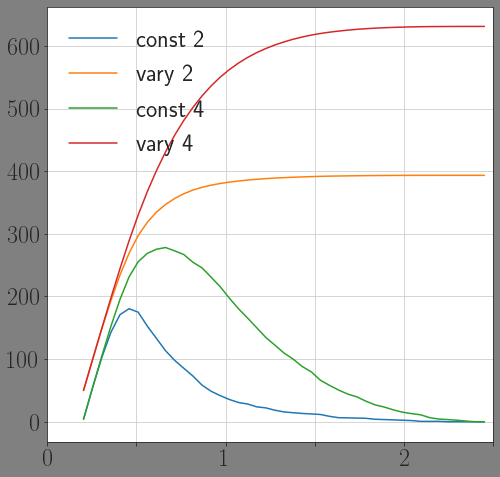

In [6]:
fig1,ax1=pl.subplots(1,2,figsize=(6,3))
fig2,ax2=pl.subplots(1,1)
for task in (2,4):
    time_store=[]
    for idx,times in df_data.loc[df_data['numtargs']==task].rts.items():
        time_store=time_store+list(times)
    counts,bins=np.histogram(time_store,np.linspace(0,2500,50))
    ax1[0].plot(bins[:-1]/1000,counts)
    surv_func=1-np.cumsum(counts)/np.sum(counts)
    ax1[1].plot(bins[:-1]/1000,surv_func)
    ax2.plot(bins[:-1][bins[:-1]>200]/1000,surv_func[bins[:-1]>200]*(bins[:-1][bins[:-1]>200]-200),label='const '+str(task))
    ax2.plot(bins[:-1][bins[:-1]>200]/1000,np.cumsum(surv_func[bins[:-1]>200]*(2500/50)),label='vary '+str(task))
ax2.set_xlim(200/1000,700/1000)
ax1[0].set_xticks([0,0.5,1,1.5,2,2.5])
ax1[0].set_xticklabels([r'$0$','',r'$1$','',r'$2$',''])
ax1[1].set_xticklabels([r'$0$','',r'$1$','',r'$2$',''])
ax1[1].set_xticks([0,0.5,1,1.5,2,2.5])
ax2.set_xticks([0,0.5,1,1.5,2,2.5])
ax2.set_xticklabels([r'$0$','',r'$1$','',r'$2$',''])
ax2.legend(frameon=False)
# ax2.set_ylim(0,8)
fig1.tight_layout()

In lieu of performance on individual trials, I'm using average preformance (per cell), if that is phi, plotted against the mean reaction time...

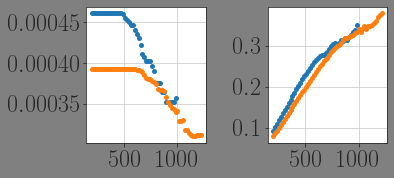

In [7]:
fig,ax=pl.subplots(1,2,figsize=(6,3))
tvecdense=np.linspace(200,2000,100)
for task in (2,4):
    avg_times=df_data.loc[df_data['numtargs']==task].rts.apply(lambda x: np.mean(x))
    P_corr=1/(1+np.exp(-df_data.loc[df_data['numtargs']==task].phi.values.astype('float')))
    RR=P_corr/(avg_times+700)
    posterior_mean=[np.mean(RR[avg_times>t]) for t in tvecdense]
    ax[0].plot(tvecdense,posterior_mean,'.')
    ax[1].plot(tvecdense,posterior_mean*tvecdense,'.')
fig.tight_layout()

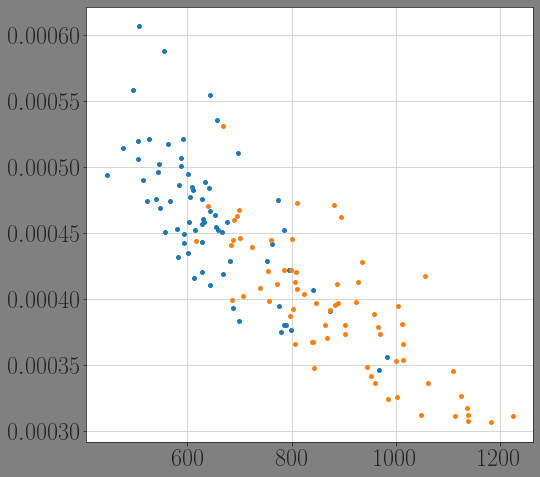

In [8]:
fig,ax=pl.subplots()
for task in (2,4):
    avg_times=df_data.loc[df_data['numtargs']==task].rts.apply(lambda x: np.mean(x))
    P_corr=1/(1+np.exp(-df_data.loc[df_data['numtargs']==task].phi.values.astype('float')))
    RR=P_corr/(avg_times+700)
    ax.plot(avg_times,RR,'.')

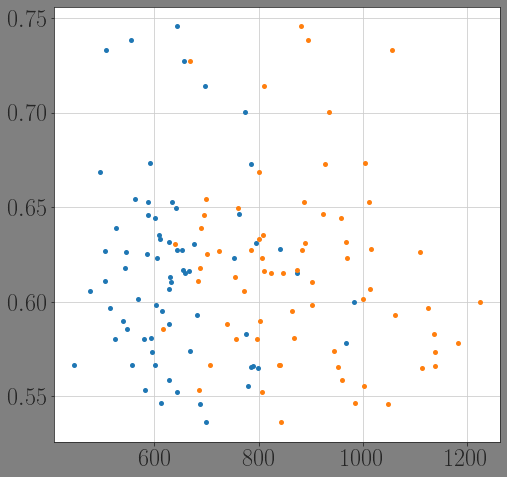

In [9]:
fig,ax=pl.subplots()
for task in (2,4):
    ax.plot(df_data.loc[df_data['numtargs']==task].rts.apply(lambda x: np.mean(x)),1/(1+np.exp(-df_data.loc[df_data['numtargs']==task].phi.values.astype('float'))),'.')

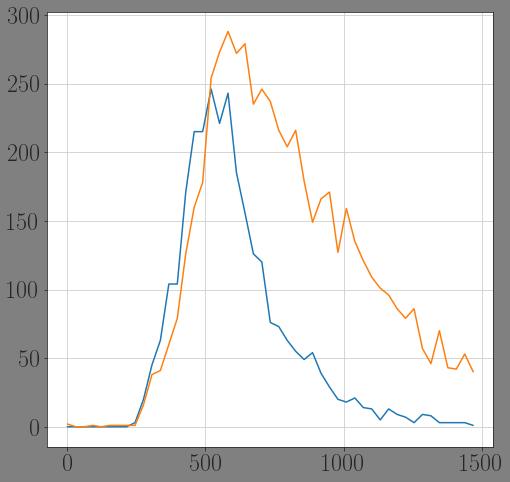

In [10]:
fig,ax=pl.subplots()
for task in (2,4):
    time_store=[]
    for idx,times in df_data.loc[df_data['numtargs']==task].rts.items():
        time_store=time_store+list(times)
    counts,bins=np.histogram(time_store,np.linspace(0,1500,50))
    ax.plot(bins[:-1],counts)